In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
data=pd.read_parquet('X_train_observed.parquet')
print(data)

             date_forecast  absolute_humidity_2m:gm3  air_density_2m:kgm3  \
0      2019-06-02 22:00:00                       7.7                1.230   
1      2019-06-02 22:15:00                       7.7                1.229   
2      2019-06-02 22:30:00                       7.7                1.228   
3      2019-06-02 22:45:00                       7.7                1.226   
4      2019-06-02 23:00:00                       7.7                1.225   
...                    ...                       ...                  ...   
118664 2022-10-21 00:00:00                       5.0                1.292   
118665 2022-10-21 00:15:00                       5.0                1.292   
118666 2022-10-21 00:30:00                       5.0                1.292   
118667 2022-10-21 00:45:00                       5.0                1.292   
118668 2022-10-21 01:00:00                       5.0                1.292   

        ceiling_height_agl:m  clear_sky_energy_1h:J  clear_sky_rad:W  \
0  

In [68]:
data=pd.read_parquet('X_train_observed.parquet')
n=0
values=[]
for el in data['date_forecast']:
    #print(el)
    #values.append(Y[el])
    n=n+1

#print(n)
#Y=np.array(data)
#data=data.drop('date_forecast',axis=1)
data=data.drop('date_forecast',axis=1)
#print(data)
# copy the data
df_max_scaled = data.copy()

# apply normalization techniques
for column in df_max_scaled.columns:
	df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()
	
# view normalized data
display(df_max_scaled)
data=df_max_scaled
#data.columns

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,...,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,0.440000,0.861948,0.141534,0.0,0.0,0.149281,0.0,0.954050,0.0,0.0,...,0.952322,-0.064035,0.0,0.942631,1.000,0.555573,0.243421,-0.292683,-0.086022,-0.0
1,0.440000,0.861247,0.140650,0.0,0.0,0.148348,0.0,0.954050,0.0,0.0,...,0.961933,-0.072994,0.0,0.943291,1.000,0.562354,0.236842,-0.292683,-0.064516,-0.0
2,0.440000,0.860547,0.139798,0.0,0.0,0.147450,0.0,0.954050,0.0,0.0,...,0.971583,-0.079954,0.0,0.943950,1.000,0.569423,0.236842,-0.292683,-0.043011,-0.0
3,0.440000,0.859145,0.138979,0.0,0.0,0.146586,0.0,0.954050,0.0,0.0,...,0.981258,-0.084933,0.0,0.944939,1.000,0.576786,0.230263,-0.284553,-0.021505,-0.0
4,0.440000,0.858444,0.138184,0.0,0.0,0.145748,0.0,0.954050,0.0,0.0,...,0.990956,-0.087853,0.0,0.945598,1.000,0.584442,0.230263,-0.284553,0.000000,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118664,0.285714,0.905396,NaN,0.0,0.0,NaN,0.0,0.931586,0.0,0.0,...,0.046145,-0.726062,0.0,0.912957,0.028,0.361472,0.085526,-0.032520,0.129032,-0.0
118665,0.285714,0.905396,NaN,0.0,0.0,NaN,0.0,0.931586,0.0,0.0,...,0.058703,-0.715183,0.0,0.912628,0.023,0.400289,0.092105,-0.048780,0.129032,-0.0
118666,0.285714,0.905396,NaN,0.0,0.0,NaN,0.0,0.931586,0.0,0.0,...,0.071095,-0.701844,0.0,0.911968,0.017,0.438933,0.092105,-0.065041,0.129032,-0.0
118667,0.285714,0.905396,NaN,0.0,0.0,NaN,0.0,0.931246,0.0,0.0,...,0.083300,-0.686165,0.0,0.911639,0.011,0.477402,0.098684,-0.081301,0.118280,-0.0


In [69]:
Y=pd.read_parquet('train_targets.parquet')
#print(Y.columns)
print(Y.iloc[:int(118669/4),:])
print(Y['pv_measurement'])
Y=np.array(Y['pv_measurement'])**1

                     time  pv_measurement
0     2019-06-02 22:00:00            0.00
1     2019-06-02 23:00:00            0.00
2     2019-06-03 00:00:00            0.00
3     2019-06-03 01:00:00            0.00
4     2019-06-03 02:00:00           19.36
...                   ...             ...
29662 2022-10-20 20:00:00            0.00
29663 2022-10-20 21:00:00            0.00
29664 2022-10-20 22:00:00            0.00
29665 2022-10-20 23:00:00            0.00
29666 2022-10-21 00:00:00            0.00

[29667 rows x 2 columns]
0         0.00
1         0.00
2         0.00
3         0.00
4        19.36
         ...  
34080     9.02
34081     0.00
34082     0.00
34083     0.00
34084     0.00
Name: pv_measurement, Length: 34085, dtype: float64


In [70]:
dt= np.array(data)
values=[]
values_useful=[]
for el in range(len(dt)):
    #print(el)
    if(el%4==0):
        if el>0:
            values.append(temp)
        temp=dt[el]
    else:
        temp=temp+dt[el]
    if el==n:
        break
#print(len(values))
#print(values)

X_train=np.array(values)
#print(X_train.shape)
X_train=X_train.T
#print(X_train.shape)
Y=Y[:29667]
print(len(Y))
#Y[Y==0] = -1000
print(Y)
#Y=Y+50
print(Y.shape)
X_train[np.isnan(X_train)]=0

29667
[0. 0. 0. ... 0. 0. 0.]
(29667,)


In [71]:
Y_modified=[]
X_train_modified=[]
for el in range(len(values)):
    #print(el)
    if(Y[el]!=0):
        X_train_modified.append(values[el])
        Y_modified.append(Y[el])
print(len(X_train_modified))
print(len(Y_modified))
X_train_modified=np.array(X_train_modified)
Y_modified=np.array(Y_modified)
Y_modified=Y_modified.T
print(X_train_modified.shape)
op=X_train_modified.copy()
print(Y_modified.shape)


16348
16348
(16348, 45)
(16348,)


In [72]:
n=0
usefuln=[]
for column in X_train:
    a=np.corrcoef(column,Y)[1][0]
    n=n+1
    print(a)
    if np.abs(a)>.632:
        usefuln.append(n)
print(usefuln)
for el in usefuln:
    print(len(X_train[el]))
final=[]
for el in usefuln:
    final.append(X_train[el])

0.23063939254795163
-0.3761624146524846
0.06029128219430224
0.7994069244475337
0.8120473627484049
0.1258010376437307
-0.06880862090093155
0.24534212287392013
0.7113955045623274
0.7038870660584825
0.8643341294974927
0.8504974520957945
-0.21771189821024717
nan
-0.048990985258724806
-0.03513801939683145
-0.06428251067851039
-0.0412109768250728
-0.046635453661010164
0.5545688550127291
-0.5868688446995495
0.18094132340792854
-0.07272142128313366
-0.1073262009597416
0.18117435749347946
0.17618221760723668
-0.04193725119873638
-0.08637123026517445
-0.40543480473067767
0.17118036614099957
-0.07161922322298679
-0.058226981339153557
nan
-0.018402812375689553
-0.13861820460315386
-0.01635217082401405
0.6957131960177344
-0.13153444215903562
0.3516912994763634
-0.1849782036471844
0.2606860704261309
-0.08155558001597939
-0.06554189409339446
-0.2796317107495886
-0.005977671687295429
[4, 5, 9, 10, 11, 12, 37]
29667
29667
29667
29667
29667
29667
29667


c:\Users\itsja\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\itsja\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [73]:
def poly(z):
    return 1/(1+np.exp(-z))

In [74]:
def model(X,Y,learning_rate,iterations,B=0):
    m=X_train.shape[1]
    n=X_train.shape[0]
    W=np.ones((n,1))
    cost_list=[]
    #print(Z)
    #print(W)
    #print(Z)
    for i in range(iterations):
        Z=np.dot(W.T,X)+B
        A=poly(Z)
        #cost function
        '''cost=-(1/m)*np.sum(A-poly(Y))
        #Gradient Descent
        dW = (1/m)*np.dot(A-poly(Y), X.T)
        dB = (1/m)*np.sum(A - poly(Y))
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        '''
        cost=-(1/m)*np.sum(A-Y)
        #Gradient Descent
        dW = -(1/m)*np.dot(A-Y, X.T)
        dB = -(1/m)*np.sum(A - Y)
        W = W - learning_rate*dW.T
        print(dW)
        B = B - learning_rate*dB

        # Keeping track of our cost function value
        cost_list.append(cost)
        #print(cost)
        
        #if(i%(iterations/10) == 0):
    print("cross entropy after ", i+1, "iteration is : ", cost)
        
    return W, B, cost_list 

(29667,)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.59166545 0.57827646 0.5349525  ... 0.05116052 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [3.9629998  3.9900002  4.         ... 0.38799998 0.181      0.079     ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0. 0. 0. ... 0. 0. 0.]
[[1670.51197117  448.47572581 1001.91296956  936.6913556   926.17598925
  1470.74119343   65.71697092]]
[[1670.51210855  448.47631181 1001.91310969  936.69142892  926.17606615
  1470.74408305   65.71706605]]
[[1670.5122582   448.47693357 1001.9132608   936.69150748  926.17614838
  1470.74719868   65.71717074]]
[[1670.51242152  448.47759371 1001.91342404  936.69159178  926.1762364
  1470.75055964   65.71728598]]
[[1670.51260007  448.47829506 1001.91360067  936.69168235  926.17633078
  1470.75418696   65.71741283]]
[[16

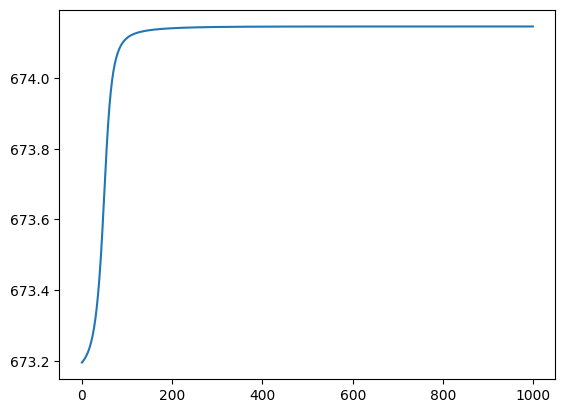

674.1455209492046


In [75]:
learning_rate=.000015
iterations=1000
X_train=np.array(final)
print(Y.shape)
print(X_train)

print(Y)
#Y[Y==0]=
a,b,c=model(X_train,Y,learning_rate,1000,B=0)
#plt.plot(Y)
plt.plot(c)
plt.show() 
Y=Y#+2000

print(sum(Y)/len(Y))

-3115410
19999875.170000054


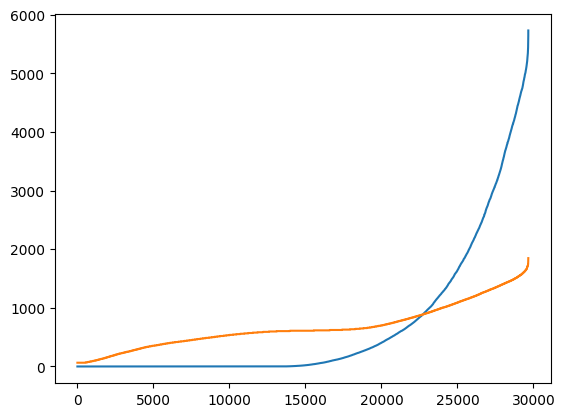

In [76]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = Z
    
    A = np.array(A, dtype = 'int64')
    #print(A)
    acc = np.sum((A - Y))/Y.shape
    #print(np.abs(A-Y))
    #print(acc)
    #print(A)
    #print(Y)
    #print("Accuracy of the model is : ", (acc))
    return(A)
#print(Y)
prediction=accuracy(X_train, Y, a, b)
#print(sum(prediction)/len(prediction))
print(sum(prediction[0]))
print(sum(Y))
k=np.sort(Y)
plt.plot(k)

plt.plot(np.sort(prediction[0]*((sum(Y)/sum(prediction[0])))))
plt.show() 

In [77]:
print(np.abs(prediction*np.abs(sum(Y)/sum(prediction[0])-Y)))
print(sum(Y)/Y.shape)
print(sum(np.abs(prediction-Y)[0])/29967)
print('hy')

[[622.70708879 622.70708879 622.70708879 ... 115.55389277  83.45558922
   70.6162678 ]]
[674.14552095]
771.3579994660779
hy


In [78]:
n=0
p=0
for el in Y:
    print(el)
    if int(el)==0:
        n=n+1
    if int(el)>0:
        p=p+1
print(p)
print(n)
print(p+n)

0.0
0.0
0.0
0.0
19.36
251.02
263.78000000000003
522.72
904.42
1238.8200000000002
2189.8799999999997
3047.2200000000003
2163.26
2686.64
3175.92
2730.86
2093.96
2774.2
1833.48
1057.54
340.12
48.4
12.540000000000001
0.0
0.0
0.0
0.0
6.38
117.04
305.58
805.42
1556.94
2812.04
2807.6400000000003
4561.26
4812.06
4766.52
4339.719999999999
2464.0
2361.0400000000004
1921.92
1918.1799999999998
681.34
226.38
235.84
220.21999999999997
38.94
0.0
0.0
0.0
0.0
10.780000000000001
104.28
284.24
807.84
1336.28
1399.4199999999998
1189.76
1719.74
1232.44
1139.6
972.1800000000001
1572.56
3044.8
2132.02
1995.4
343.42
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
102.51999999999998
209.44
989.7800000000001
317.02000000000004
370.26
130.68
67.76
0.0
0.0
0.0
0.0
2.42
18.48
40.48
423.28
514.8
398.64
2736.58
1704.78
514.58
234.29999999999998
320.98
423.94
317.46000000000004
606.3199999999999
610.94
285.12
229.89999999999998
134.42
24.86
2.42
0.0
0.0
0.0
0.0
4.619999999999998
98

In [79]:
#### nodufied data
print(X_train_modified.shape)
print(len(X_train_modified.T))
X_train_modified=X_train_modified.T
print(X_train_modified)
Xuseful=pd.DataFrame(X_train_modified)
Xuseful.to_csv('efficient_data.csv')
Yuseful=pd.DataFrame(Y_modified)
Yuseful.to_csv('Y_modified.csv')

(16348, 45)
45
[[ 2.0457144   2.1142857   2.1771429  ...  1.4057143   1.4457144
   1.44      ]
 [ 3.4141555   3.4099507   3.40014    ...  3.5262787   3.5304835
   3.5388927 ]
 [ 0.32558706  0.2626029   0.2458612  ...  1.3968203   1.2626191
   0.94144464]
 ...
 [-0.7642277  -0.7154472  -0.7154472  ...  0.49593496  0.4308943
   0.34959352]
 [ 0.39784944  0.34408602  0.32258064 ...  0.32258064  0.16129033
   0.23655912]
 [-0.         -0.         -0.         ... -0.         -0.
  -0.        ]]


In [80]:

a=pd.read_csv('efficient_data.csv')
#print(a['1'])
#a.remove(44)
a=np.array(a)
print(len(a))
print(Y_modified)
corcoef_modified=[]

print(X_train_modified)
for el in X_train_modified:
    #print(el)
    #k=el[1:]
    k=el
    p=np.corrcoef(k,Y_modified)
    print(p[0][1])
    if (abs(p[0][1])>.5 ):
        corcoef_modified.append(el)


45
[  19.36  251.02  263.78 ... 1047.64  514.14   38.72]
[[ 2.0457144   2.1142857   2.1771429  ...  1.4057143   1.4457144
   1.44      ]
 [ 3.4141555   3.4099507   3.40014    ...  3.5262787   3.5304835
   3.5388927 ]
 [ 0.32558706  0.2626029   0.2458612  ...  1.3968203   1.2626191
   0.94144464]
 ...
 [-0.7642277  -0.7154472  -0.7154472  ...  0.49593496  0.4308943
   0.34959352]
 [ 0.39784944  0.34408602  0.32258064 ...  0.32258064  0.16129033
   0.23655912]
 [-0.         -0.         -0.         ... -0.         -0.
  -0.        ]]
0.12608804574113378
-0.31859666678568344
nan
0.718104418655184
0.7367411188917602
nan
-0.06107869923326562
0.15281024136897334
0.5854709083169775
0.5738754158606767
0.8344662624470176
0.8153175022916651
-0.3066557013338589
nan
-0.050738584946793674
-0.029531690661496468
-0.06349495367833115
-0.04459897874962589
-0.0532094160882417
0.28203631837552934
-0.3484144321569804
0.18601773452677084
-0.09808055956523457
-0.14563881986357433
0.1860958752375508
0.1816893

c:\Users\itsja\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\itsja\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [81]:
print(len(corcoef_modified))
X_train_modified=np.array(corcoef_modified)

7


(7, 16348)
[  19.36  251.02  263.78 ... 1047.64  514.14   38.72]
[[1652.9389411  1670.51719165  984.76378017 1001.92016283  936.6922337
   926.17725019 1685.66932564]]
[[1652.93921338 1670.51746014  984.7640395  1001.9204361   936.69229728
   926.17732218 1685.66973741]]
[[1652.93950292 1670.51774587  984.7643134  1001.92072431  936.69236514
   926.1773987  1685.67017289]]
[[1652.93981123 1670.51805038  984.76460301 1001.92102863  936.69243767
   926.17748014 1685.67063394]]
[[1652.94014001 1670.51837534  984.76490959 1001.92135035  936.69251529
   926.17756693 1685.67112263]]
[[1652.94049112 1670.51872264  984.76523453 1001.92169088  936.69259847
   926.17765956 1685.67164124]]
[[1652.94086667 1670.51909439  984.76557938 1001.9220518   936.69268775
   926.17775856 1685.67219233]]
[[1652.94126902 1670.51949296  984.76594585 1001.92243487  936.69278371
   926.17786456 1685.67277872]]
[[1652.94170082 1670.519921    984.76633585 1001.92284204  936.69288704
   926.17797823 1685.67340356]]


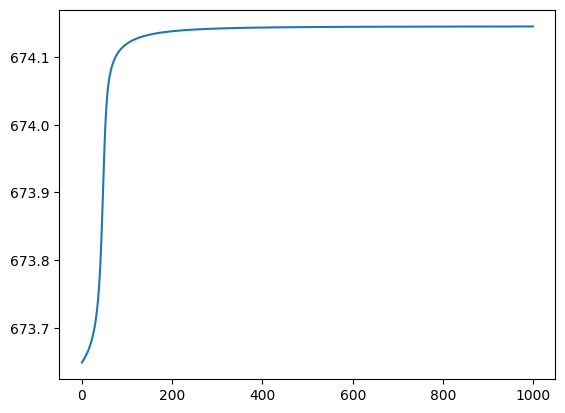

674.1455209492046


In [83]:

print(X_train_modified.shape)
print(Y_modified)
#Y[Y==0]=
a,b,c=model(X_train_modified,Y_modified,learning_rate,1000,B=0)
#plt.plot(Y)
plt.plot(c)
plt.show() 
Y=Y#+2000

print(sum(Y)/len(Y))

[-1381.10650661]
-2578454
19999875.170000054


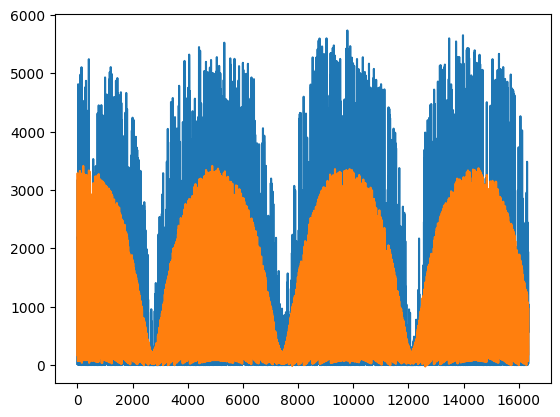

In [100]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = Z
    
    A = np.array(A, dtype = 'int64')
    #print(A)
    acc = np.sum((A - Y))/Y.shape
    #print(np.abs(A-Y))
    print(acc)
    #print(A)
    #print(Y)
    #print("Accuracy of the model is : ", (acc))
    return(A)
#print(Y)
prediction=accuracy(X_train_modified, Y_modified, a, b)
#print(sum(prediction)/len(prediction))
print(sum(prediction[0]))
print(sum(Y))
k=np.sort(Y_modified)
plt.plot(Y_modified)

plt.plot((prediction[0]*((sum(Y)/sum(prediction[0])))))
plt.show()

In [99]:
print(np.abs(prediction*(sum(Y_modified)/sum(prediction[0]))-Y_modified))
print(sum(Y_modified)/Y_modified.shape)
print(sum(np.abs(prediction*(sum(Y_modified)/sum(prediction[0]))-Y_modified)[0])/Y.shape)
print('hy')

ValueError: operands could not be broadcast together with shapes (1,29667) (16348,) 